In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
df=df.drop(["PassengerId","Name","SibSp","Ticket","Cabin","Embarked","Parch"],axis=1)

In [10]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [9]:
df.Age=df.Age.fillna(df.Age.mean())

In [12]:
df.head(6)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.000000,7.2500,0
1,1,female,38.000000,71.2833,1
2,3,female,26.000000,7.9250,1
3,1,female,35.000000,53.1000,1
4,3,male,35.000000,8.0500,0
5,3,male,29.699118,8.4583,0


In [14]:
x=df.drop(["Survived"],axis=1)
y=df.Survived

In [17]:
label=LabelEncoder()
x.Sex=label.fit_transform(x.Sex)

In [18]:
x

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [22]:
naive.score(x_test,y_test)

0.8156424581005587

In [23]:
import seaborn as sns

In [24]:
y_predict=naive.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
ce=confusion_matrix(y_test,y_predict)

In [26]:
ce

array([[98, 18],
       [15, 48]], dtype=int64)

<Axes: >

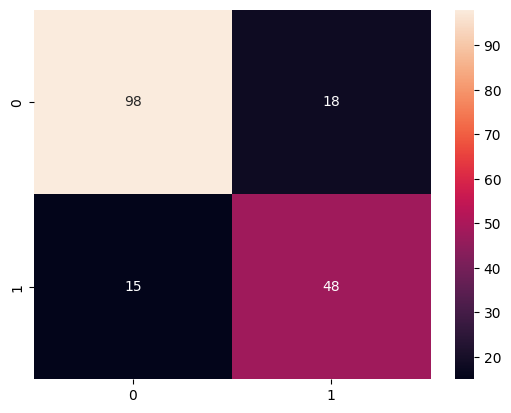

In [27]:
sns.heatmap(ce,annot=True
           )